### TAKEHOME EXERCISE

- Dataset yang dipakai adalah Titanic
- Buat model ML dengan Logistic regression, Decision Tree Classifier & Random Forest
- Evaluasi model menggunakan Confusion Matrix


Variable Description

- Survived: Survived (1) or died (0); this is the target variable
- Pclass: Passenger's class (1st, 2nd or 3rd class)
- Name: Passenger's name
- Sex: Passenger's sex
- Age: Passenger's age
- SibSp: Number of siblings/spouses aboard
- Parch: Number of parents/children aboard
- Ticket: Ticket number
- Fare: Fare
- Cabin: Cabin
- Embarked: Port of embarkation

#### Importing Data

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

#### Overview

In [3]:
df_train = pd.read_csv('train.csv')
df_test  = pd.read_csv('test.csv')
df_surv  = pd.read_csv('gender_submission.csv').drop(columns=['PassengerId'],axis=1)

In [4]:
df = pd.concat([df_test,df_surv], axis = 1)
df_titanic = pd.concat([df_train, df], ignore_index = True).drop(columns=['PassengerId'],axis=1)

In [5]:
df_titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
df_titanic.isna().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

#### Handling The Missing Values & Labeling

In [7]:
df_titanic[df_titanic['Fare'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [8]:
df_titanic.groupby('Pclass')['Fare'].value_counts().sort_values(ascending = False)

Pclass  Fare   
3       8.0500     60
2       13.0000    59
3       7.7500     55
        7.8958     49
2       26.0000    42
                   ..
        12.0000     1
3       10.1708     1
2       9.6875      1
1       49.5000     1
2       10.7083     1
Name: Fare, Length: 288, dtype: int64

In [9]:
round(df_titanic[df_titanic['Pclass']==3]['Fare'].mean(),4)

13.3029

In [10]:
df_titanic['Fare'].fillna(13.3029, inplace = True)

In [11]:
df_titanic[df_titanic['Embarked'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [12]:
df_titanic.groupby('Pclass')['Embarked'].value_counts().sort_values(ascending = False)

Pclass  Embarked
3       S           495
2       S           242
1       S           177
        C           141
3       Q           113
        C           101
2       C            28
        Q             7
1       Q             3
Name: Embarked, dtype: int64

In [13]:
df_titanic['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [14]:
df_titanic['Embarked'].fillna('S', inplace = True)

In [15]:
df_titanic[df_titanic['Age'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
1299,1,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1301,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1304,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1307,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [16]:
df_titanic_m = df_titanic[df_titanic['Sex']=='male']
df_titanic_f = df_titanic[df_titanic['Sex']=='female']
print(' Male Age Null   :', df_titanic_m['Age'].isna().sum(), '\n','Female Age Null :', df_titanic_f['Age'].isna().sum())

 Male Age Null   : 185 
 Female Age Null : 78


In [17]:
df_titanic_m['Parch'].value_counts()

0    709
1     82
2     44
5      2
4      2
3      2
9      1
6      1
Name: Parch, dtype: int64

In [18]:
df_titanic_f['Parch'].value_counts()

0    293
1     88
2     69
3      6
5      4
4      4
9      1
6      1
Name: Parch, dtype: int64

In [19]:
mcat0 = df_titanic_m['Age'][df_titanic_m['Parch']==0]
mcat1 = df_titanic_m['Age'][df_titanic_m['Parch']==1]
mcat2 = df_titanic_m['Age'][df_titanic_m['Parch']==2]
mcat3 = df_titanic_m['Age'][df_titanic_m['Parch']==3]
mcat4 = df_titanic_m['Age'][df_titanic_m['Parch']>3]

In [20]:
fcat0 = df_titanic_f['Age'][df_titanic_f['Parch']==0]
fcat1 = df_titanic_f['Age'][df_titanic_f['Parch']==1]
fcat2 = df_titanic_f['Age'][df_titanic_f['Parch']==2]
fcat3 = df_titanic_f['Age'][df_titanic_f['Parch']==3]
fcat4 = df_titanic_f['Age'][df_titanic_f['Parch']>3]

In [21]:
pd.DataFrame({'ParCh' : ['0', '1', '2', '3', '>3'], 
              'male ' : [mcat0.median(),mcat1.median(),mcat2.median(),mcat3.median(),mcat4.median()],
              'female' : [fcat0.median(),fcat1.median(),fcat2.median(),fcat3.median(),fcat4.median()]})

,ParCh,male,female
0,0,29.0,29.0
1,1,21.0,24.0
2,2,12.0,21.0
3,3,38.5,42.0
4,>3,40.0,40.0


In [22]:
#Male
mcat0 = mcat0.fillna(30)
mcat1 = mcat1.fillna(19)
mcat2 = mcat2.fillna(10.5)
mcat3 = mcat3.fillna(16)
mcat4 = mcat4.fillna(40)

#Female
fcat0 = fcat0.fillna(29)
fcat1 = fcat1.fillna(26)
fcat2 = fcat2.fillna(18)
fcat3 = fcat3.fillna(36)
fcat4 = fcat4.fillna(39)


In [23]:
#concat between gender
fill_male = pd.concat([mcat0,mcat1,mcat2,mcat3,mcat4])
fill_female = pd.concat([fcat0,fcat1,fcat2,fcat3,fcat4])

#concat to all gender
fill_age = pd.concat([fill_male, fill_female])

In [24]:
df_titanic['Age'] = df_titanic['Age'].fillna(fill_age)

In [25]:
df_titanic = df_titanic.drop('Cabin', axis=1)

In [26]:
df_titanic.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [27]:
df_titanic['Embarked'] = LabelEncoder().fit_transform(df_titanic['Embarked'])
df_titanic['Sex'] = LabelEncoder().fit_transform(df_titanic['Sex'])

In [28]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   int32  
 4   Age       1309 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1309 non-null   float64
 9   Embarked  1309 non-null   int32  
dtypes: float64(2), int32(2), int64(4), object(2)
memory usage: 92.2+ KB


In [29]:
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [30]:
df_titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.377387,2.294882,0.644003,29.641459,0.498854,0.385027,33.280206,1.493506
std,0.484918,0.837836,0.478997,13.018262,1.041658,0.865560,51.741830,0.814244
min,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,0.000000,3.000000,1.000000,29.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,2.000000


#### Parameter

In [68]:
#LogRegression
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [1,10,100,1000,10000]
LRG_param = {'penalty' : penalty, 'solver': solver, 'max_iter' : max_iter}

In [67]:
#Random Forest
max_depth = [10, 20, 30, 40, 'None']
min_samples_leaf = [1, 2, 4]
min_samples_split = [2, 5, 10]
n_estimators = [1,10,100,1000]

RFC_param = {'max_depth' : max_depth, 'min_samples_leaf': min_samples_leaf, 'min_samples_split' : min_samples_split, 'n_estimators' : n_estimators}

In [66]:
#KNN
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

KNN_param = {'leaf_size' : leaf_size, 'n_neighbors' : n_neighbors, 'p' : p}

### Splitting Data (Train 80%)

#### Fitting Model

In [33]:
df = df_titanic.copy()

In [34]:
#Split x & y (target)
x = df.drop(['Survived', 'Name', 'Ticket'], axis=1)
y = df['Survived']

In [70]:
#Split Train 80%
x_train, x_test, y_train, y_test =  train_test_split(x, y, train_size=0.8, shuffle=False)

#Model
LRG = LogisticRegression().fit(x_train, y_train)
RFC = RandomForestClassifier().fit(x_train, y_train)
KNN = KNeighborsClassifier().fit(x_train, y_train)

#### Hyperparameter Tuning

In [71]:
# Hyper
RSCV_LRG = RandomizedSearchCV(estimator = LRG, param_distributions = LRG_param, cv=5).fit(x_train, y_train)
RSCV_RFC = RandomizedSearchCV(estimator = RFC, param_distributions = RFC_param, cv=5).fit(x_train, y_train)
RSCV_KNN = RandomizedSearchCV(estimator = KNN, param_distributions = KNN_param, cv=5).fit(x_train, y_train)

In [72]:
print('best param LRG : ' ,RSCV_LRG.best_params_)
print('best param RFC : ' ,RSCV_RFC.best_params_)
print('best param KNN : ' ,RSCV_KNN.best_params_)

best param LRG :  {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 1000}
best param RFC :  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 40}
best param KNN :  {'p': 1, 'n_neighbors': 7, 'leaf_size': 49}


In [73]:
LRG_best = LogisticRegression(solver = 'liblinear', penalty = 'l1', max_iter = 10).fit(x_train, y_train)
RFC_best = RandomForestClassifier(n_estimators = 100, min_samples_split = 5, min_samples_leaf = 1, max_depth = 10).fit(x_train, y_train)
KNN_best = KNeighborsClassifier(p = 1, n_neighbors = 7, leaf_size = 49).fit(x_train, y_train)

In [75]:
LRG_score = LRG.score(x_test,y_test)
RFC_score = RFC.score(x_test,y_test)
KNN_score = KNN.score(x_test,y_test)
LRG_best_score = LRG_best.score(x_test,y_test)
RFC_best_score = RFC_best.score(x_test,y_test)
KNN_best_score = KNN_best.score(x_test,y_test)

In [78]:
model80_score = pd.DataFrame({'Model' : ['LogRegression', 'RandomForest', 'KNNeighbors'], 
                              'Normal': [LRG_score, RFC_score, KNN_score], 
                              'Hyper' : [LRG_best_score, RFC_best_score, KNN_best_score]})

In [79]:
model80_score

,Model,Normal,Hyper
0,LogRegression,0.973282,0.984733
1,RandomForest,0.885496,0.919847
2,KNNeighbors,0.648855,0.694656


#### Predict

In [80]:
#Logistic Regression
yp_LRG = LRG_best.predict(x_test)

#Random Forest
yp_RFC = RFC_best.predict(x_test)

#KNNeighbors
yp_KNN = KNN_best.predict(x_test)

#### Logistic Regression

In [55]:
cm_LRG = confusion_matrix(y_test, yp_LRG)
cm_LRG

array([[166,   1],
       [  3,  92]], dtype=int64)

In [56]:
labels = ['Died', 'Survived']

              precision    recall  f1-score   support

        Died       0.98      0.99      0.99       167
    Survived       0.99      0.97      0.98        95

    accuracy                           0.98       262
   macro avg       0.99      0.98      0.98       262
weighted avg       0.98      0.98      0.98       262



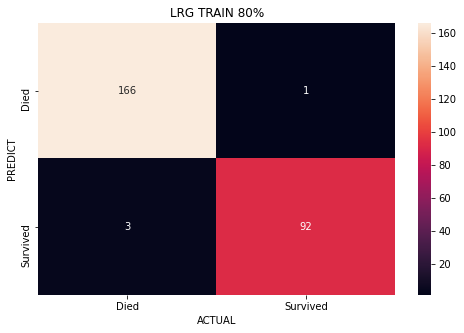

In [57]:
print(classification_report(y_test, yp_LRG, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_LRG, annot=True, fmt=".0f", ax=ax)

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('LRG TRAIN 80%')
plt.xlabel("ACTUAL")
plt.ylabel("PREDICT")
plt.show()

In [58]:
report_LRG = pd.DataFrame(classification_report(y_test, yp_LRG, target_names= labels, output_dict=True)).T

#### Random Forest

In [60]:
cm_RFC = confusion_matrix(y_test, yp_RFC)
cm_RFC

array([[158,   9],
       [ 14,  81]], dtype=int64)

              precision    recall  f1-score   support

        Died       0.92      0.95      0.93       167
    Survived       0.90      0.85      0.88        95

    accuracy                           0.91       262
   macro avg       0.91      0.90      0.90       262
weighted avg       0.91      0.91      0.91       262



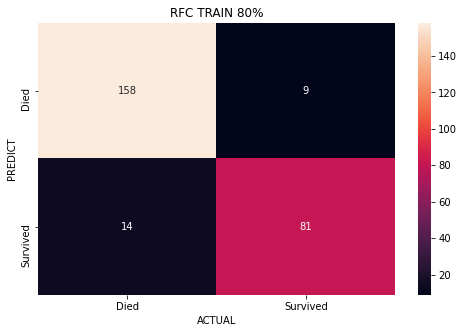

In [61]:
print(classification_report(y_test, yp_RFC, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_RFC, annot=True, fmt=".0f", ax=ax)

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('RFC TRAIN 80%')
plt.xlabel("ACTUAL")
plt.ylabel("PREDICT")
plt.show()

In [62]:
report_RFC = pd.DataFrame(classification_report(y_test, yp_RFC, target_names= labels, output_dict=True)).T

#### K-Nearest Neighbors

In [81]:
cm_KNN = confusion_matrix(y_test, yp_KNN)
cm_KNN

array([[128,  39],
       [ 41,  54]], dtype=int64)

              precision    recall  f1-score   support

        Died       0.76      0.77      0.76       167
    Survived       0.58      0.57      0.57        95

    accuracy                           0.69       262
   macro avg       0.67      0.67      0.67       262
weighted avg       0.69      0.69      0.69       262



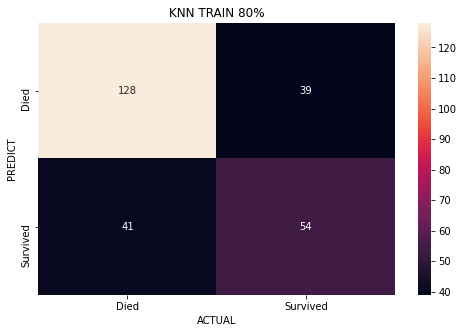

In [83]:
print(classification_report(y_test, yp_KNN, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_KNN, annot=True, fmt=".0f", ax=ax)

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('KNN TRAIN 80%')
plt.xlabel("ACTUAL")
plt.ylabel("PREDICT")
plt.show()

In [92]:
report_KNN = pd.DataFrame(classification_report(y_test, yp_KNN, target_names= labels, output_dict=True)).T

### Splitting Data (Train 90%)

#### Fitting Model

In [85]:
df1 = df_titanic.copy()

In [86]:
#Split x & y (target)
x1 = df1.drop(['Survived', 'Name', 'Ticket'], axis=1)
y1 = df1['Survived']

In [87]:
#Split Train 90%
x1_train, x1_test, y1_train, y1_test =  train_test_split(x1, y1, train_size=0.9, shuffle=False)

#Model
LRG1 = LogisticRegression().fit(x1_train, y1_train)
RFC1 = RandomForestClassifier().fit(x1_train, y1_train)
KNN1 = KNeighborsClassifier().fit(x1_train, y1_train)

#### Hyperparameter Tuning

In [88]:
# Hyper
RSCV_LRG1 = RandomizedSearchCV(estimator = LRG1, param_distributions = LRG_param, cv=5).fit(x1_train, y1_train)
RSCV_RFC1 = RandomizedSearchCV(estimator = RFC1, param_distributions = RFC_param, cv=5).fit(x1_train, y1_train)
RSCV_KNN1 = RandomizedSearchCV(estimator = KNN1, param_distributions = KNN_param, cv=5).fit(x1_train, y1_train)

In [89]:
print('best param LRG1 : ' ,RSCV_LRG1.best_params_)
print('best param RFC1 : ' ,RSCV_RFC1.best_params_)
print('best param KNN1 : ' ,RSCV_KNN1.best_params_)

best param LRG1 :  {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100}
best param RFC1 :  {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 20}
best param KNN1 :  {'p': 1, 'n_neighbors': 8, 'leaf_size': 34}


In [90]:
LRG1_best = LogisticRegression(solver = 'liblinear', penalty = 'l2', max_iter = 100).fit(x1_train, y1_train)
RFC1_best = RandomForestClassifier(n_estimators = 1000, min_samples_split = 10, min_samples_leaf = 2, max_depth = 20).fit(x1_train, y1_train)
KNN1_best = KNeighborsClassifier(p = 1, n_neighbors = 8, leaf_size = 34).fit(x1_train, y1_train)

In [91]:
LRG1_score = LRG1.score(x1_test,y1_test)
RFC1_score = RFC1.score(x1_test,y1_test)
KNN1_score = KNN1.score(x1_test,y1_test)
LRG1_best_score = LRG1_best.score(x1_test,y1_test)
RFC1_best_score = RFC1_best.score(x1_test,y1_test)
KNN1_best_score = KNN1_best.score(x1_test,y1_test)

In [93]:
model90_score = pd.DataFrame({'Model' : ['LogRegression', 'RandomForest', 'KNNeighbors'], 
                              'Normal': [LRG1_score, RFC1_score, KNN1_score], 
                              'Hyper' : [LRG1_best_score, RFC1_best_score, KNN1_best_score]})

In [95]:
model90_score

,Model,Normal,Hyper
0,LogRegression,0.992366,0.992366
1,RandomForest,0.923664,0.969466
2,KNNeighbors,0.679389,0.778626


#### Predict

In [96]:
#Logistic Regression
yp_LRG1 = LRG1_best.predict(x1_test)

#Random Forest
yp_RFC1 = RFC1_best.predict(x1_test)

#KNNeighbors
yp_KNN1 = KNN1_best.predict(x1_test)

#### Logistic Regression - Confusion Matrix

In [97]:
cm_LRG1 = confusion_matrix(y1_test, yp_LRG1)
cm_LRG1

array([[87,  0],
       [ 1, 43]], dtype=int64)

              precision    recall  f1-score   support

        Died       0.99      1.00      0.99        87
    Survived       1.00      0.98      0.99        44

    accuracy                           0.99       131
   macro avg       0.99      0.99      0.99       131
weighted avg       0.99      0.99      0.99       131



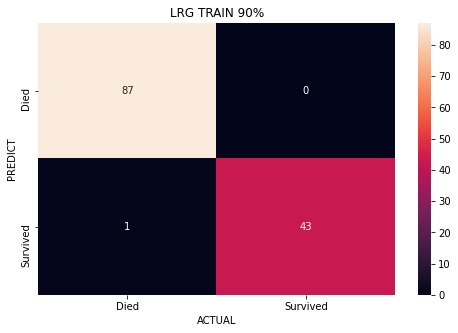

In [98]:
print(classification_report(y1_test, yp_LRG1, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_LRG1, annot=True, fmt=".0f", ax=ax)

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('LRG TRAIN 90%')
plt.xlabel("ACTUAL")
plt.ylabel("PREDICT")
plt.show()

In [99]:
report_LRG1 = pd.DataFrame(classification_report(y1_test, yp_LRG1, target_names= labels, output_dict=True)).T

#### Random Forest - Confusion Matrix

In [100]:
cm_RFC1 = confusion_matrix(y1_test, yp_RFC1)
cm_RFC1

array([[86,  1],
       [ 3, 41]], dtype=int64)

              precision    recall  f1-score   support

        Died       0.97      0.99      0.98        87
    Survived       0.98      0.93      0.95        44

    accuracy                           0.97       131
   macro avg       0.97      0.96      0.97       131
weighted avg       0.97      0.97      0.97       131



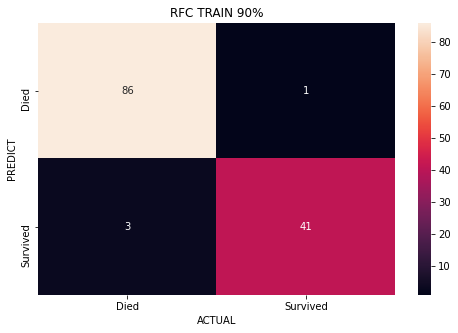

In [101]:
print(classification_report(y1_test, yp_RFC1, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_RFC1, annot=True, fmt=".0f", ax=ax)

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('RFC TRAIN 90%')
plt.xlabel("ACTUAL")
plt.ylabel("PREDICT")
plt.show()

In [102]:
report_RFC1 = pd.DataFrame(classification_report(y1_test, yp_RFC1, target_names= labels, output_dict=True)).T

#### K-Nearest Neighbors

In [103]:
cm_KNN1 = confusion_matrix(y1_test, yp_KNN1)
cm_KNN1

array([[75, 12],
       [17, 27]], dtype=int64)

              precision    recall  f1-score   support

        Died       0.82      0.86      0.84        87
    Survived       0.69      0.61      0.65        44

    accuracy                           0.78       131
   macro avg       0.75      0.74      0.74       131
weighted avg       0.77      0.78      0.78       131



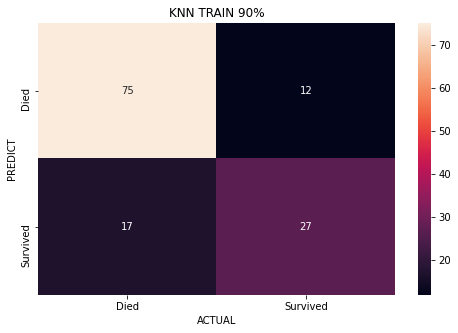

In [104]:
print(classification_report(y1_test, yp_KNN1, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_KNN1, annot=True, fmt=".0f", ax=ax)

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('KNN TRAIN 90%')
plt.xlabel("ACTUAL")
plt.ylabel("PREDICT")
plt.show()

In [105]:
report_KNN1 = pd.DataFrame(classification_report(y1_test, yp_KNN1, target_names= labels, output_dict=True)).T

### SUMMARY

#### Logistic Regression Comparison

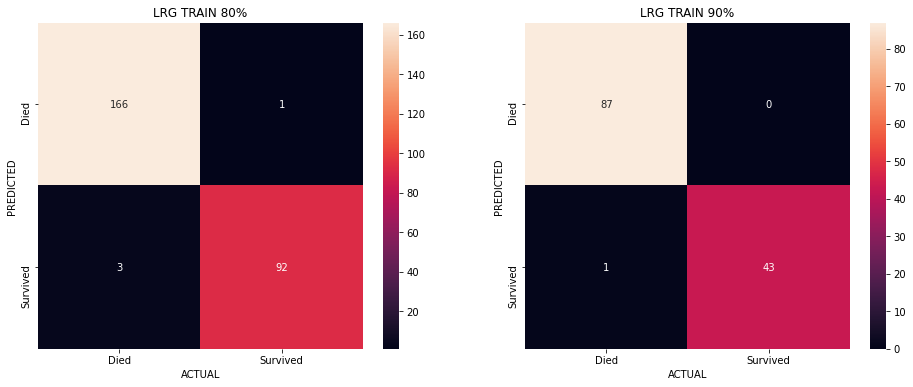

In [106]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
sns.heatmap(cm_LRG, annot=True, fmt=".0f", ax=ax1)
sns.heatmap(cm_LRG1, annot=True, fmt=".0f", ax=ax2)

ax1.xaxis.set_ticklabels(labels), ax1.yaxis.set_ticklabels(labels)
ax2.xaxis.set_ticklabels(labels), ax2.yaxis.set_ticklabels(labels)

ax1.set_title('LRG TRAIN 80%'), ax2.set_title('LRG TRAIN 90%')
ax1.set_xlabel('ACTUAL'), ax2.set_xlabel('ACTUAL')
ax1.set_ylabel('PREDICTED'), ax2.set_ylabel('PREDICTED')

plt.show()

In [107]:
pd.concat([report_LRG, report_LRG1], keys = ['LRG TRAIN 80%', 'LRG TRAIN 90%'])

precision    recall  f1-score     support
LRG TRAIN 80% Died           0.982249  0.994012  0.988095  167.000000
              Survived       0.989247  0.968421  0.978723   95.000000
              accuracy       0.984733  0.984733  0.984733    0.984733
              macro avg      0.985748  0.981217  0.983409  262.000000
              weighted avg   0.984786  0.984733  0.984697  262.000000
LRG TRAIN 90% Died           0.988636  1.000000  0.994286   87.000000
              Survived       1.000000  0.977273  0.988506   44.000000
              accuracy       0.992366  0.992366  0.992366    0.992366
              macro avg      0.994318  0.988636  0.991396  131.000000
              weighted avg   0.992453  0.992366  0.992344  131.000000

#### Random Forest Comparison

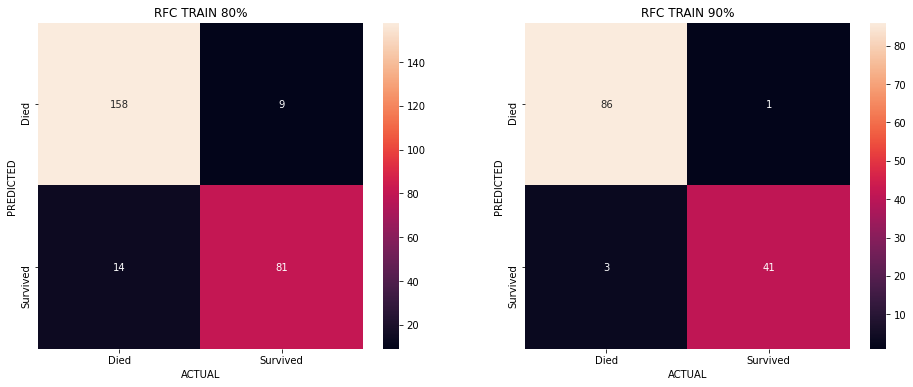

In [108]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
sns.heatmap(cm_RFC, annot=True, fmt=".0f", ax=ax1)
sns.heatmap(cm_RFC1, annot=True, fmt=".0f", ax=ax2)

ax1.xaxis.set_ticklabels(labels), ax1.yaxis.set_ticklabels(labels)
ax2.xaxis.set_ticklabels(labels), ax2.yaxis.set_ticklabels(labels)

ax1.set_title('RFC TRAIN 80%'), ax2.set_title('RFC TRAIN 90%')
ax1.set_xlabel('ACTUAL'), ax2.set_xlabel('ACTUAL')
ax1.set_ylabel('PREDICTED'), ax2.set_ylabel('PREDICTED')

plt.show()

In [109]:
pd.concat([report_RFC, report_RFC1], keys = ['RFC TRAIN 80%', 'RFC TRAIN 90%'])

precision    recall  f1-score     support
RFC TRAIN 80% Died           0.918605  0.946108  0.932153  167.000000
              Survived       0.900000  0.852632  0.875676   95.000000
              accuracy       0.912214  0.912214  0.912214    0.912214
              macro avg      0.909302  0.899370  0.903915  262.000000
              weighted avg   0.911859  0.912214  0.911675  262.000000
RFC TRAIN 90% Died           0.966292  0.988506  0.977273   87.000000
              Survived       0.976190  0.931818  0.953488   44.000000
              accuracy       0.969466  0.969466  0.969466    0.969466
              macro avg      0.971241  0.960162  0.965381  131.000000
              weighted avg   0.969617  0.969466  0.969284  131.000000

#### K-Nearest Neighbors Comparison

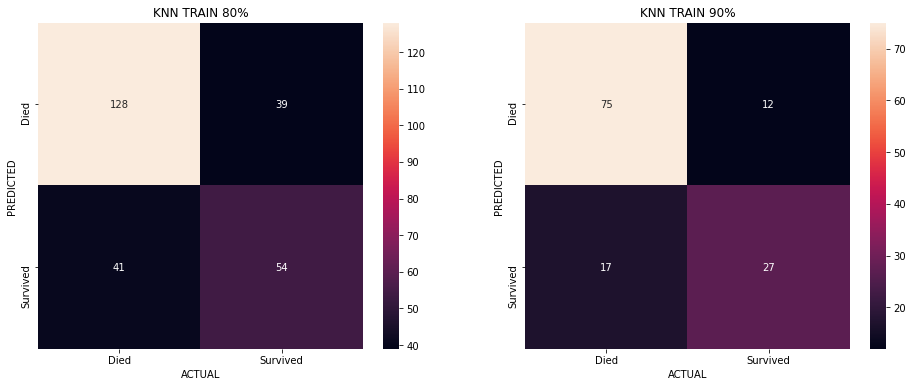

In [110]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
sns.heatmap(cm_KNN, annot=True, fmt=".0f", ax=ax1)
sns.heatmap(cm_KNN1, annot=True, fmt=".0f", ax=ax2)

ax1.xaxis.set_ticklabels(labels), ax1.yaxis.set_ticklabels(labels)
ax2.xaxis.set_ticklabels(labels), ax2.yaxis.set_ticklabels(labels)

ax1.set_title('KNN TRAIN 80%'), ax2.set_title('KNN TRAIN 90%')
ax1.set_xlabel('ACTUAL'), ax2.set_xlabel('ACTUAL')
ax1.set_ylabel('PREDICTED'), ax2.set_ylabel('PREDICTED')

plt.show()

In [111]:
pd.concat([report_KNN, report_KNN1], keys = ['KNN TRAIN 80%', 'KNN TRAIN 90%'])

precision    recall  f1-score     support
KNN TRAIN 80% Died           0.757396  0.766467  0.761905  167.000000
              Survived       0.580645  0.568421  0.574468   95.000000
              accuracy       0.694656  0.694656  0.694656    0.694656
              macro avg      0.669021  0.667444  0.668186  262.000000
              weighted avg   0.693307  0.694656  0.693941  262.000000
KNN TRAIN 90% Died           0.815217  0.862069  0.837989   87.000000
              Survived       0.692308  0.613636  0.650602   44.000000
              accuracy       0.778626  0.778626  0.778626    0.778626
              macro avg      0.753763  0.737853  0.744296  131.000000
              weighted avg   0.773935  0.778626  0.775050  131.000000